# SI 608 Final Project

In [ ]:
DRIVE_PATH = 'drive/My Drive/Colab Notebooks/SI 608'

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # connect to Google Drive

Mounted at /content/drive


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
!pwd
os.chdir("/content/" + DRIVE_PATH)
!ls

/content
03_rq3.ipynb			 dolphins.gml		    VoterFraud2020-main
608_Final_Project_Dolphin.ipynb  SI608_Group_Project.ipynb


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import json
from networkx.algorithms.community import greedy_modularity_communities
from networkx.readwrite import json_graph
from networkx.algorithms import clique

In [ ]:
FILE_PATH = 'dolphins.gml'

# Loading the dolphin social network from the GML file
dolphin_network = nx.read_gml(FILE_PATH)

In [ ]:
num_nodes = dolphin_network.number_of_nodes()
num_edges = dolphin_network.number_of_edges()
print(num_nodes, num_edges)

62 159


In [ ]:
# Show the detail of the data
d = json_graph.node_link_data(dolphin_network)
# Pretty printing the result for better readability
print(json.dumps(d, indent=4))

{
    "directed": false,
    "multigraph": false,
    "graph": {},
    "nodes": [
        {
            "id": "Beak"
        },
        {
            "id": "Beescratch"
        },
        {
            "id": "Bumper"
        },
        {
            "id": "CCL"
        },
        {
            "id": "Cross"
        },
        {
            "id": "DN16"
        },
        {
            "id": "DN21"
        },
        {
            "id": "DN63"
        },
        {
            "id": "Double"
        },
        {
            "id": "Feather"
        },
        {
            "id": "Fish"
        },
        {
            "id": "Five"
        },
        {
            "id": "Fork"
        },
        {
            "id": "Gallatin"
        },
        {
            "id": "Grin"
        },
        {
            "id": "Haecksel"
        },
        {
            "id": "Hook"
        },
        {
            "id": "Jet"
        },
        {
            "id": "Jonah"
        },
        {
            "

Understanding the data format:




The nodes are labeled with the ID of the dolphin number and name. They start at 0.


The links contain the source (Dolphin number) and the target (Another dolphin number)


{'id': 55, 'label': 'Vau'},


Dolphin 'Vau' only has two encounters on the visualization,


https://raw.githubusercontent.com/jeremyshantz/dolphin-social-network/master/dolphin.png


'Haecksel' and 'Trigger'


{'source': 15, 'target': 55}, - Haecksel is ID 15


{'source': 51, 'target': 55}, - Trigger is ID 51


The encounters are not repeated more than one time.

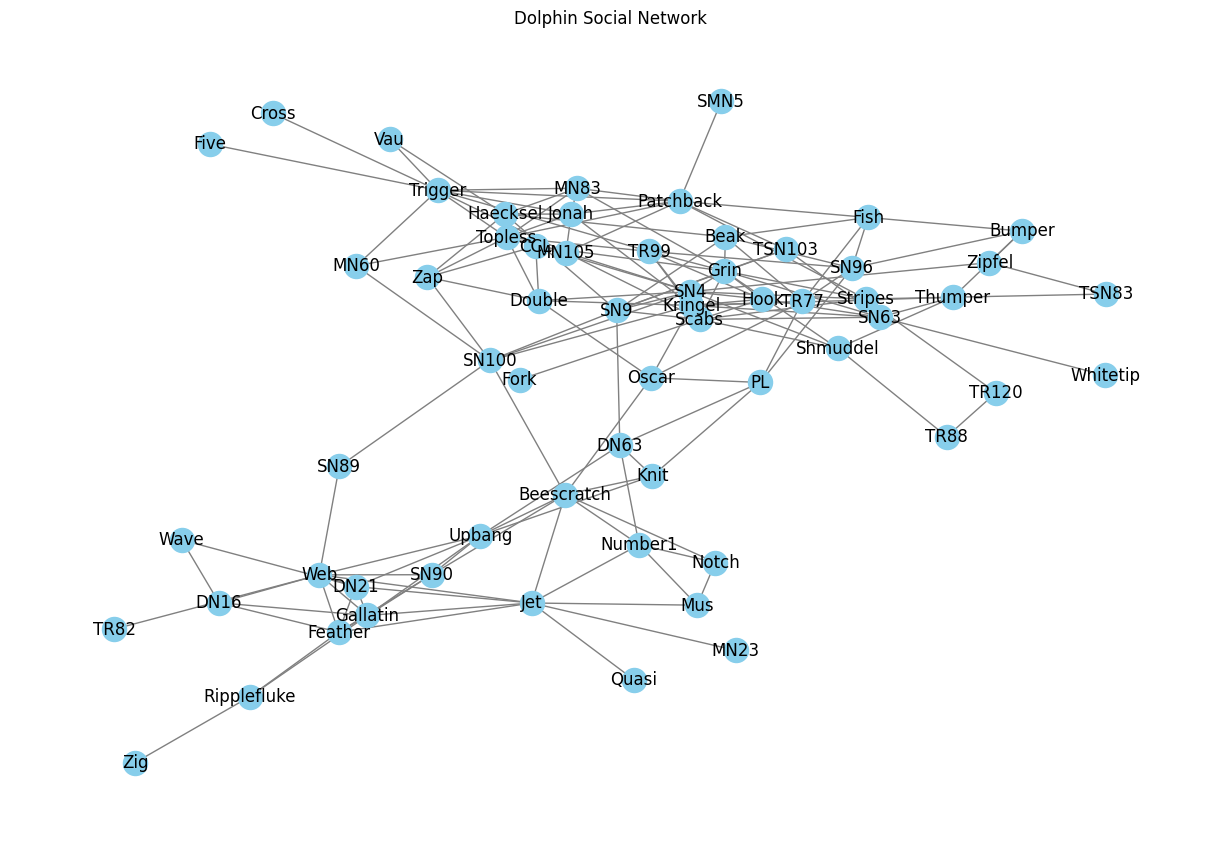

In [ ]:
# Basic visualization of the dolphin social network
plt.figure(figsize=(12, 8))
nx.draw(dolphin_network, with_labels=True, node_color='skyblue', edge_color='gray')
plt.title("Dolphin Social Network")
plt.show()

## Basic Metrics: Centrality

Degree Centrality: Identifies the most connected dolphins.

In [ ]:
degree_centrality = nx.degree_centrality(dolphin_network)
top_5_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

In [ ]:
print(top_5_degree)

[('Grin', 0.19672131147540983), ('SN4', 0.18032786885245902), ('Topless', 0.18032786885245902), ('Scabs', 0.1639344262295082), ('Trigger', 0.1639344262295082)]


Closeness Centrality: Highlights dolphins that can efficiently interact with others in the network.

In [ ]:
closeness_centrality = nx.closeness_centrality(dolphin_network)
top_5_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

In [ ]:
print(top_5_closeness)

[('SN100', 0.4178082191780822), ('SN9', 0.40397350993377484), ('SN4', 0.39869281045751637), ('Kringel', 0.391025641025641), ('Grin', 0.3765432098765432)]


Betweenness Centrality: Shows dolphins that act as bridges within the network.

In [ ]:
betweenness_centrality = nx.betweenness_centrality(dolphin_network)
top_5_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

In [ ]:
print(top_5_betweenness)

[('SN100', 0.24823719602893804), ('Beescratch', 0.21332443553281097), ('SN9', 0.1431495183426175), ('SN4', 0.13856978865859435), ('DN63', 0.11823861926938342)]


Eigenvector Centrality: Reflects the influence of a dolphin based on the connections.

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(dolphin_network)
top_5_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

In [ ]:
print(top_5_eigenvector)

[('Grin', 0.3157810764804676), ('SN4', 0.3005609284704956), ('Topless', 0.28500310473240437), ('Scabs', 0.281097017160587), ('TR99', 0.21769051331081507)]


# Community Detection

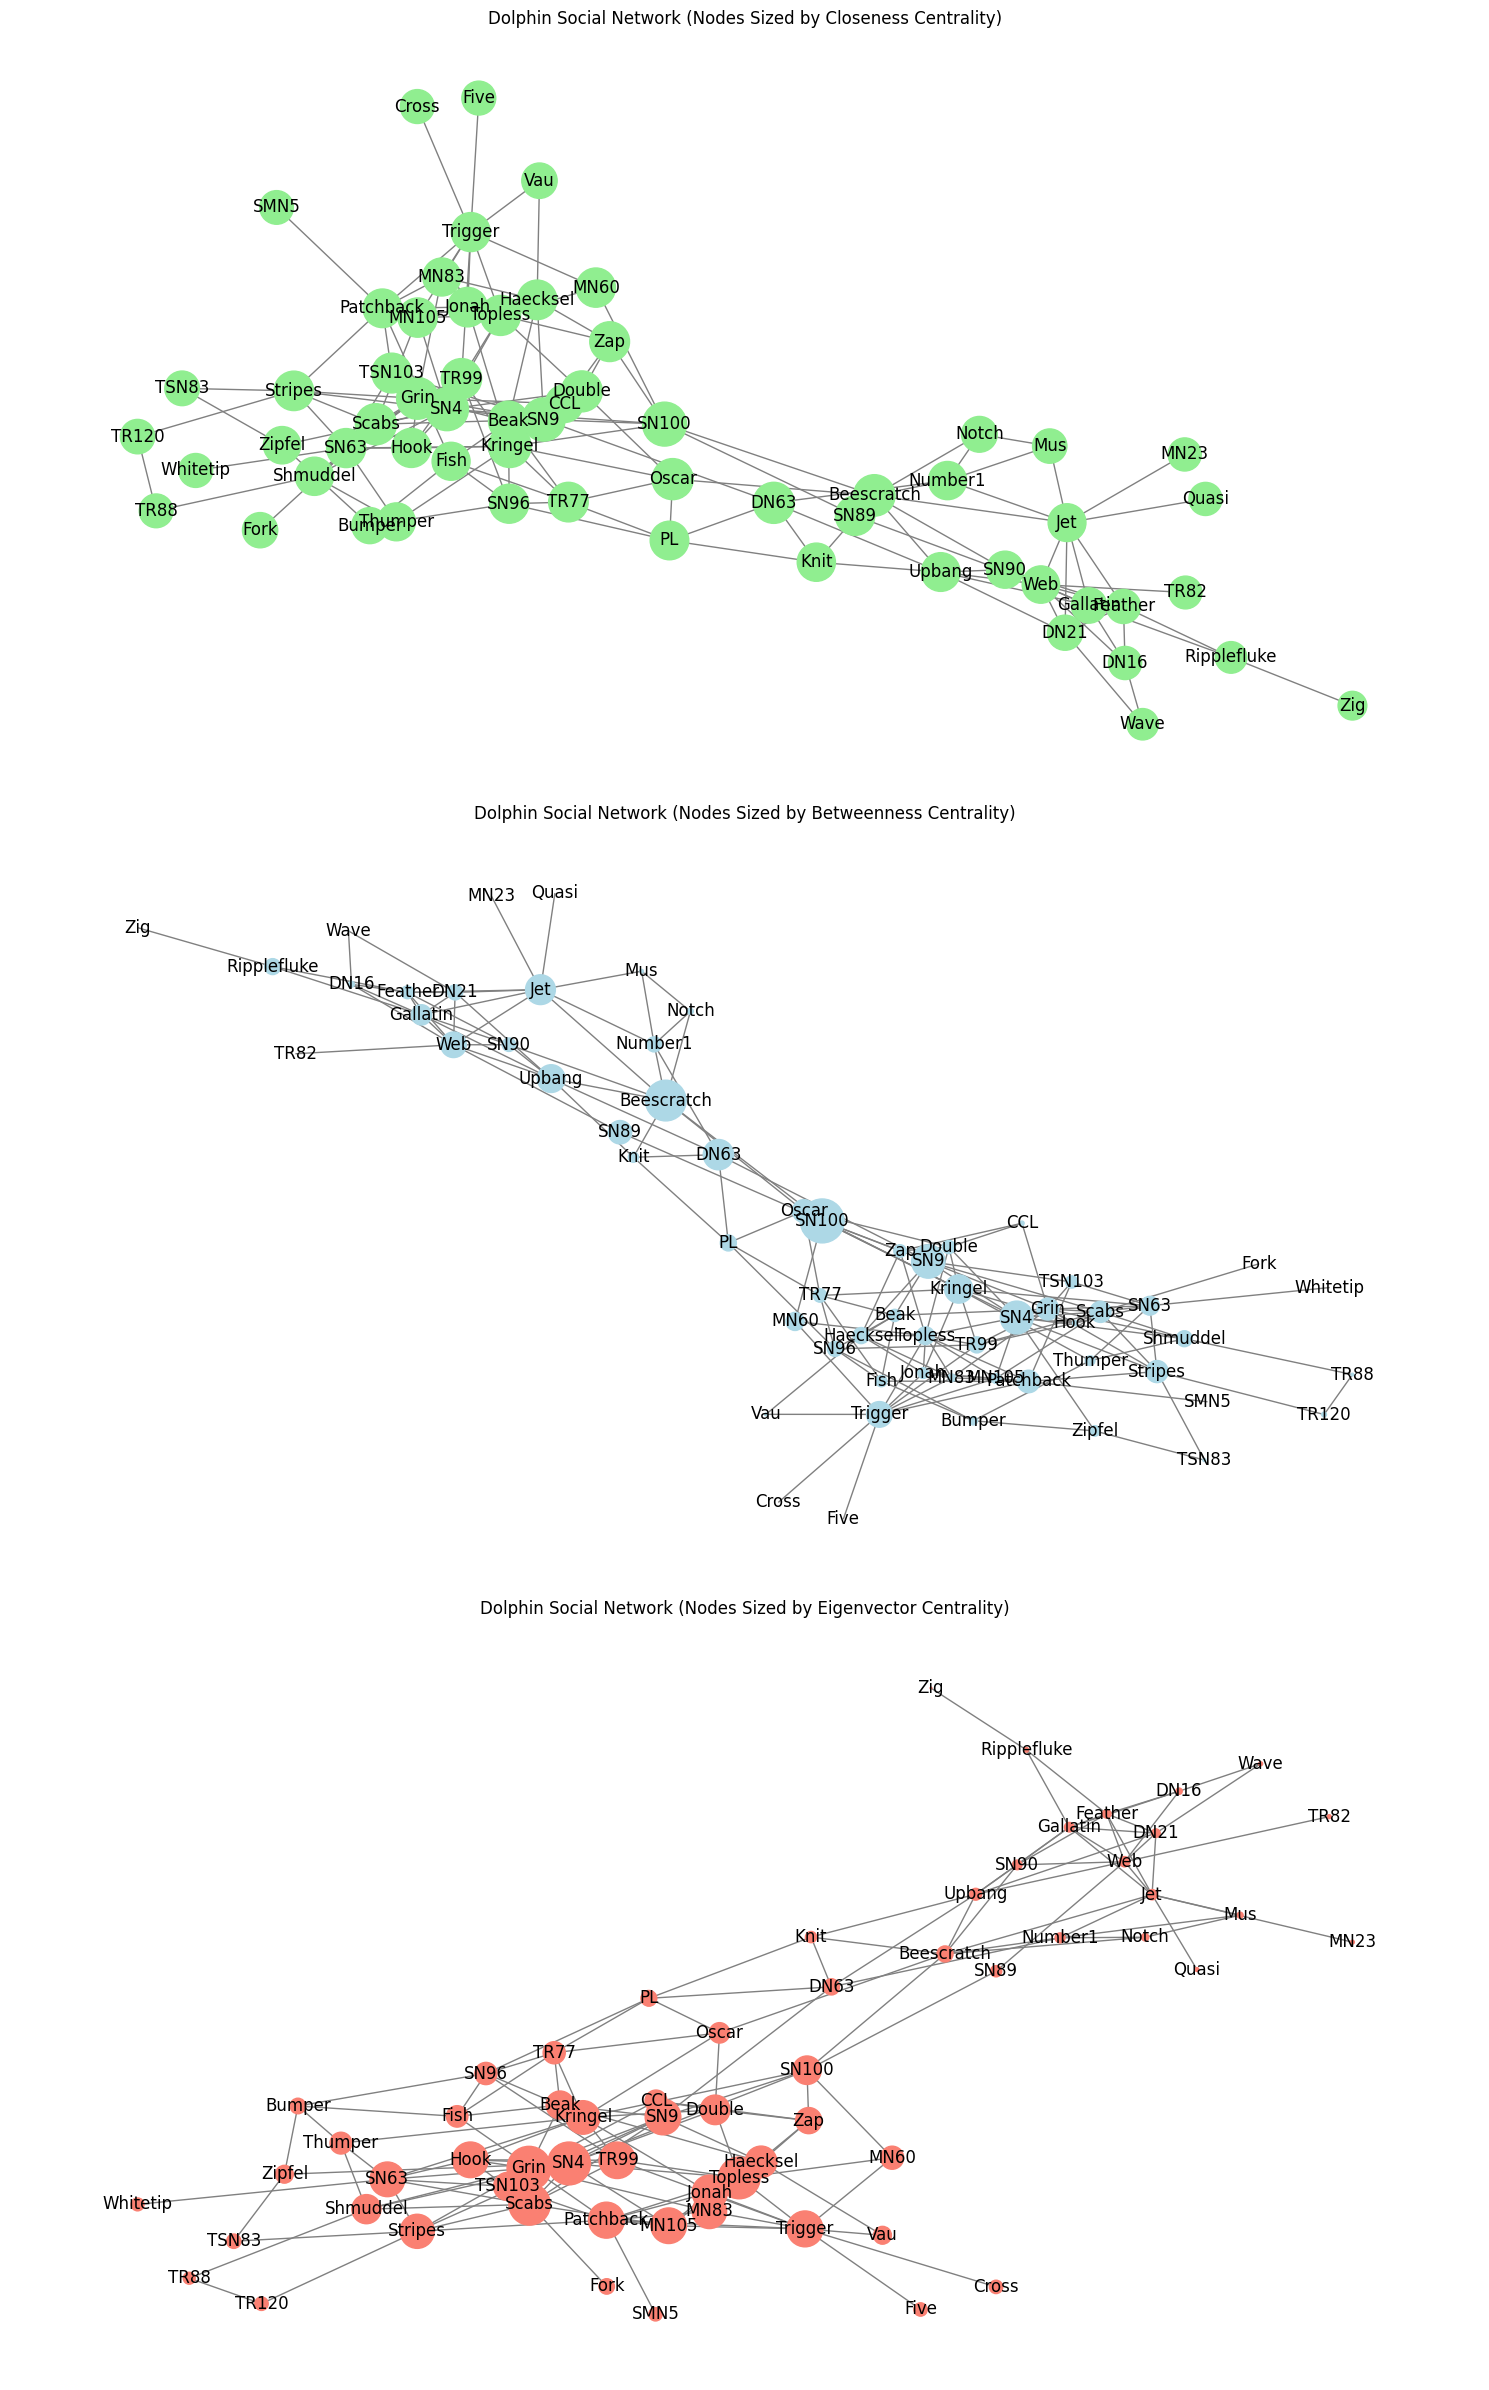

In [ ]:
# Normalizing these centrality measures for visualization purposes
max_closeness_centrality = max(closeness_centrality.values())
max_betweenness_centrality = max(betweenness_centrality.values())
max_eigenvector_centrality = max(eigenvector_centrality.values())

normalized_closeness_centrality = {node: centrality / max_closeness_centrality * 1000 for node, centrality in closeness_centrality.items()}
normalized_betweenness_centrality = {node: centrality / max_betweenness_centrality * 1000 for node, centrality in betweenness_centrality.items()}
normalized_eigenvector_centrality = {node: centrality / max_eigenvector_centrality * 1000 for node, centrality in eigenvector_centrality.items()}

# Creating subplots for each centrality measure
fig, axes = plt.subplots(3, 1, figsize=(15, 24))

# Closeness Centrality
nx.draw(dolphin_network,
        ax=axes[0],
        nodelist=closeness_centrality.keys(),
        node_size=[normalized_closeness_centrality[node] for node in dolphin_network.nodes()],
        node_color='lightgreen',
        edge_color='gray',
        with_labels=True)
axes[0].set_title("Dolphin Social Network (Nodes Sized by Closeness Centrality)")

# Betweenness Centrality
nx.draw(dolphin_network,
        ax=axes[1],
        nodelist=betweenness_centrality.keys(),
        node_size=[normalized_betweenness_centrality[node] for node in dolphin_network.nodes()],
        node_color='lightblue',
        edge_color='gray',
        with_labels=True)
axes[1].set_title("Dolphin Social Network (Nodes Sized by Betweenness Centrality)")

# Eigenvector Centrality
nx.draw(dolphin_network,
        ax=axes[2],
        nodelist=eigenvector_centrality.keys(),
        node_size=[normalized_eigenvector_centrality[node] for node in dolphin_network.nodes()],
        node_color='salmon',
        edge_color='gray',
        with_labels=True)
axes[2].set_title("Dolphin Social Network (Nodes Sized by Eigenvector Centrality)")

plt.tight_layout()
plt.show()


Closeness Centrality (Top Visualization): Nodes are sized based on how close they are to all other nodes in the network. Larger nodes represent dolphins that can quickly interact with others in the network.

Betweenness Centrality (Middle Visualization): Nodes are sized based on the number of shortest paths that pass through them. Larger nodes indicate dolphins that act as bridges between different parts of the network.

Eigenvector Centrality (Bottom Visualization): Nodes are sized based on the centrality of their neighbors. Larger nodes represent dolphins that are connected to other highly connected dolphins, indicating influential individuals in the network.

In [ ]:
# Using the Greedy Modularity method for community detection
communities = list(greedy_modularity_communities(dolphin_network))

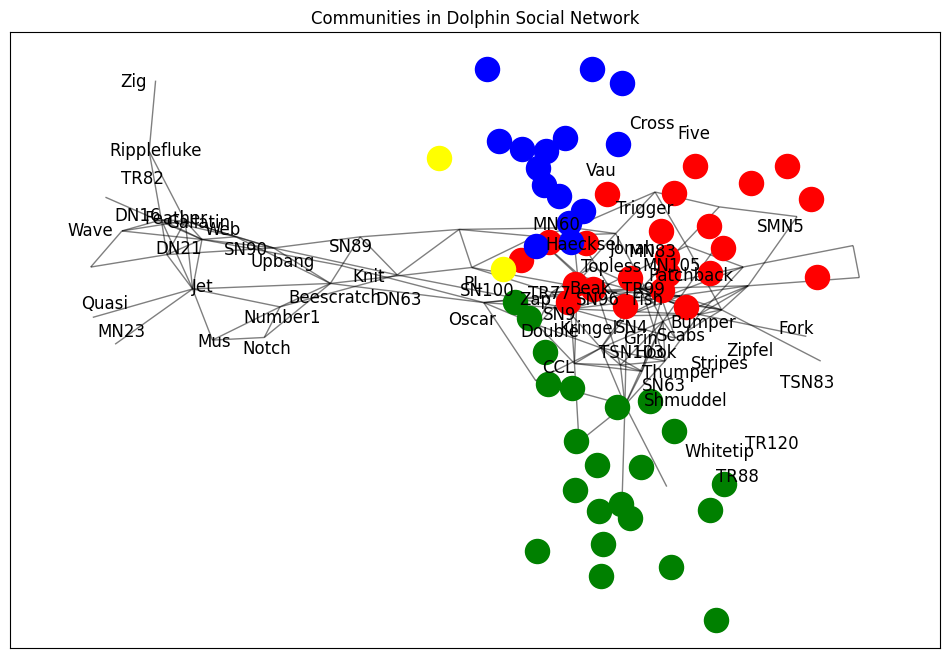

In [ ]:
# Visualizing the communities
plt.figure(figsize=(12, 8))
colors = ['red', 'green', 'blue', 'yellow', 'purple']
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(dolphin_network, pos=nx.spring_layout(dolphin_network),
                           nodelist=list(community), node_color=colors[i % len(colors)])
nx.draw_networkx_edges(dolphin_network, pos=nx.spring_layout(dolphin_network), alpha=0.5)
nx.draw_networkx_labels(dolphin_network, pos=nx.spring_layout(dolphin_network))
plt.title("Communities in Dolphin Social Network")
plt.show()

In [ ]:
# Number of communities and some example nodes from each community
num_communities = len(communities)
community_examples = {f"Community {i+1}": list(community)[:3] for i, community in enumerate(communities)}
num_communities, community_examples

(4,
 {'Community 1': ['TSN103', 'Stripes', 'TR99'],
  'Community 2': ['Jet', 'Quasi', 'Knit'],
  'Community 3': ['CCL', 'Patchback', 'MN60'],
  'Community 4': ['SN100', 'SN89']})

## Clique Detection

In [ ]:
maximal_cliques = list(clique.find_cliques(dolphin_network))
# Finding the size of the largest clique(s)
largest_clique_size = max(len(clique) for clique in maximal_cliques)
# Filtering for the largest cliques
largest_cliques = [clique for clique in maximal_cliques if len(clique) == largest_clique_size]
print(largest_cliques)

[['Patchback', 'Jonah', 'Topless', 'Trigger', 'MN105'], ['Patchback', 'Jonah', 'Topless', 'Trigger', 'MN83'], ['DN21', 'Gallatin', 'Web', 'Feather', 'Jet']]


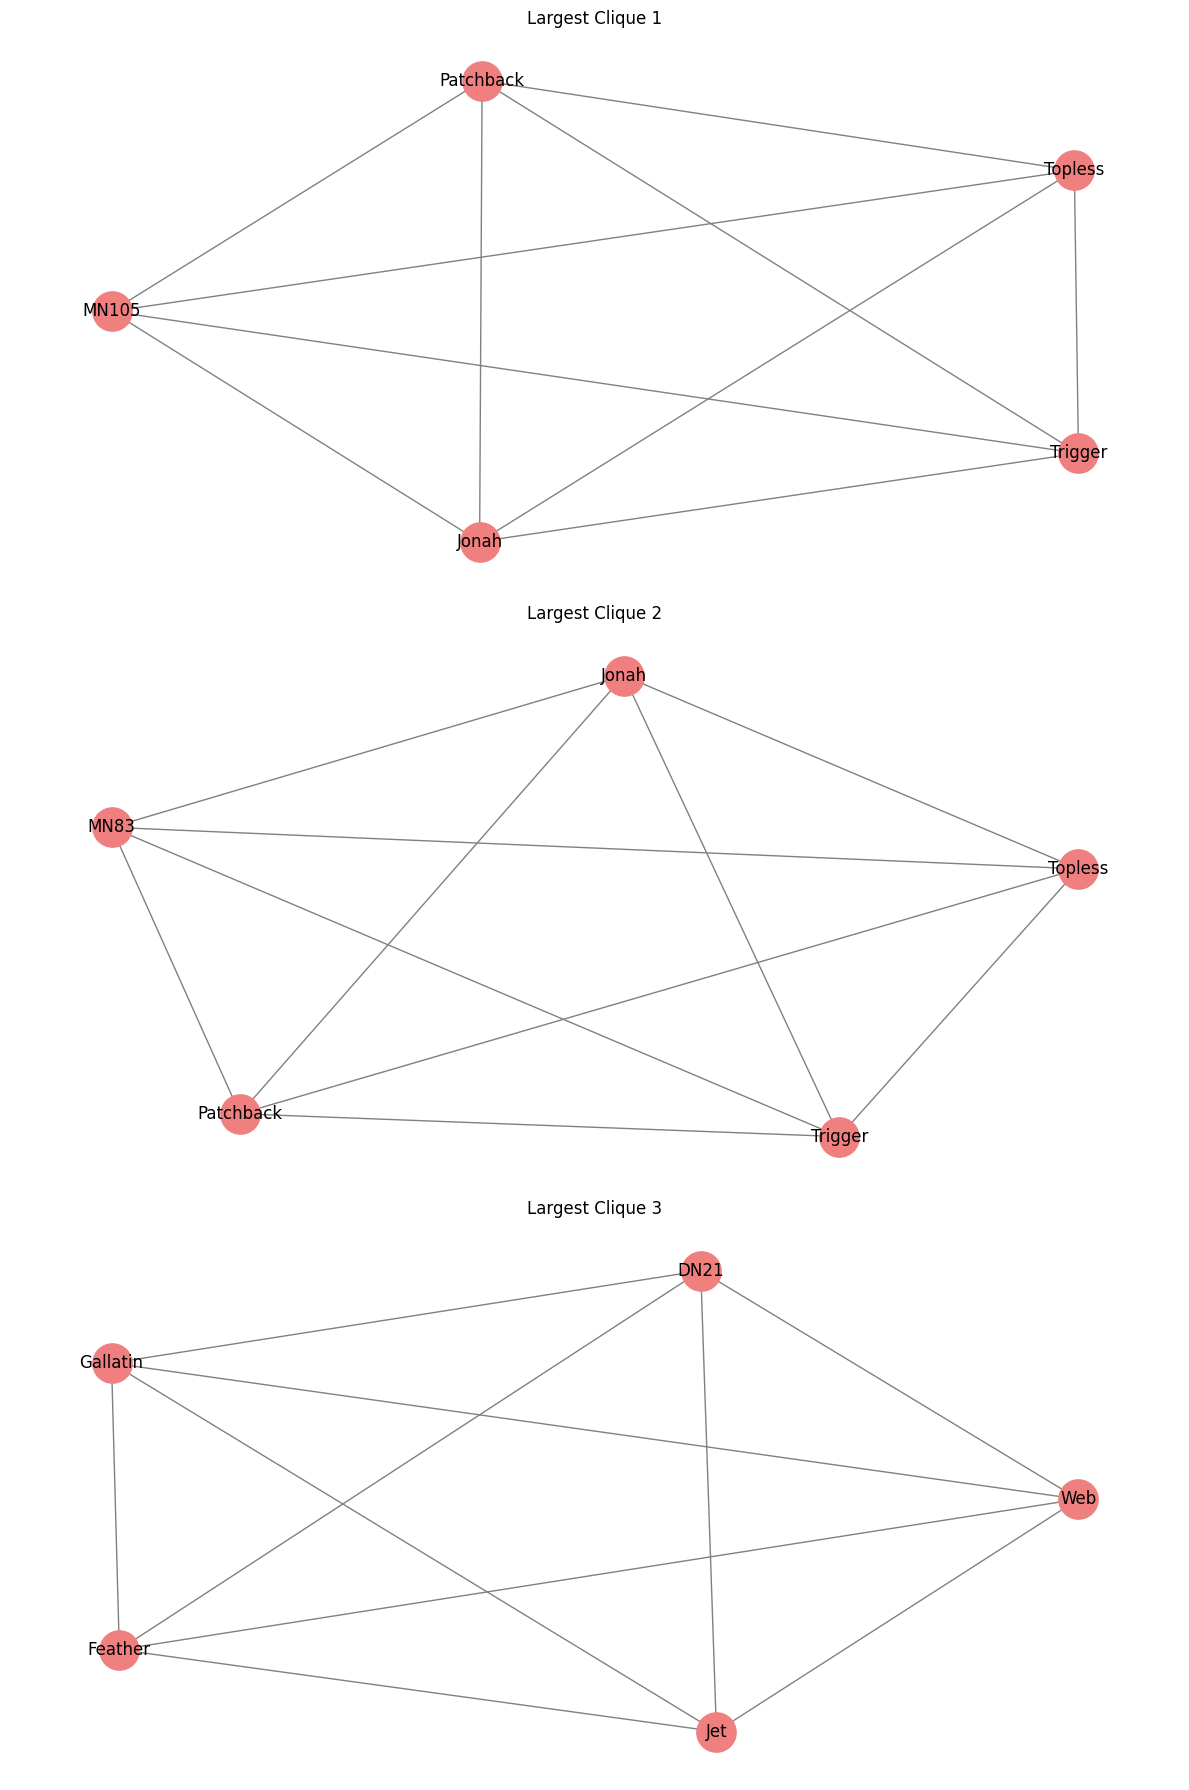

In [ ]:
# Visualizing the largest cliques in the dolphin social network

# Creating a subplot for each of the largest cliques
fig, axes = plt.subplots(len(largest_cliques), 1, figsize=(12, len(largest_cliques) * 6))

for i, clique in enumerate(largest_cliques):
    # Creating a subgraph for each clique
    clique_graph = dolphin_network.subgraph(clique)

    # Drawing the subgraph
    nx.draw(clique_graph,
            ax=axes[i],
            with_labels=True,
            node_color='lightcoral',
            node_size=800,
            edge_color='gray')

    axes[i].set_title(f"Largest Clique {i+1}")

plt.tight_layout()
plt.show()

Largest Clique 1: Includes 'DN21', 'Gallatin', 'Web', 'Jet', 'Feather'.


Largest Clique 2: Comprises 'Trigger', 'Topless', 'Jonah', 'Patchback', 'MN105'.


Largest Clique 3: Consists of 'Trigger', 'Topless', 'Jonah', 'Patchback', 'MN83'.